# Лабораторная работа №6 
## Липатова София
## А-14-21  
# Вариант №27

In [79]:
import numpy as np
import matplotlib.pyplot as plt

**Задача 6.1.**
Вычислить значение интеграла $I =  \int_{1}^{3} P_m(x) \,dx $, где $ P_m(x) = \sum_{i=0}^{m} c_i x^i$, с помощью  квадратурных  формул  левых прямоугольников и по формуле индивидуального варианта с точностью $\epsilon = 0.01$. Вычислить интеграл по формуле Гаусса.

$ P_m(x) = 0.8 + 6.5x – 4.4x^2 + 6.1x^3	– 3.6x^4$

In [80]:
def P(x):
    return 0.8 + 6.5*x - 4.4*x**2 + 6.1*x**3 - 3.6*x**4

seg = np.array([1,3])


1. Вычислить аналитически значение интеграла.

$I =  \int_{1}^{3} P_m(x) \,dx = 0.8x + \frac {6.52} {2} x^2 - \frac{4.4} {3} x^3 + \frac {6.1} {4} x^4 - \frac {3.6}{5} x^5   \Big|_{1}^{3} = -62.7733$

2. Используя выражение для остаточного члена интегрирования для формулы левых прямоугольников, оценить шаг интегрирования  h , при котором  величина погрешности  квадратурной формулы  будет меньше $\epsilon$. Вычислить число отрезков разбиения n.

$R = \max_{x \in [1, 3]}| f^1(x)| \frac {b-a}{2} h$

$\frac {b-a}{2} = \frac {3-1}{2}  = 1$

$f^1(x) = - 14.4x^3 + 18.3x^2 - 8.8 x + 6.5$ - быстро убывающая функция

$max |f1(x)| = |f^1(3)| = 244$

$R = 244 h < 0.01$

$h<\frac{0.01} {244}$

$h=0.00004$

$n = (b-a)/h  = 2/0.00004 = 50000$

3. Вычислить значение интеграла $I^h$  по составной квадратурной  формуле левых прямоугольников  с найденным шагом  h . Найти величину погрешности $R^h = |I-I^h|$  .

In [81]:
def lrec (h,n,x):
    sum = 0
    for i in range(0,n): #не включает n
        sum+=P(x[i])
        
    return h*sum

h = 0.00004
n = 50000
x = np.linspace(1,3, num = n)



Ih = lrec(h,n,x)
print("I^h = ",Ih)

def err(x,y):
    return np.abs(x-y)

I = -62.7733

print("R^h = ",err(I,Ih))

I^h =  -62.774893899413996
R^h =  0.0015938994139972351


$\epsilon  = 0.0016 < 0.01$
Погрешность соответствует теоретическим ожиданиям. 

2. Используя выражение для остаточного  члена интегрирования для формулы Симпсона, оценить шаг интегрирования  h , при котором  величина погрешности  квадратурной формулы  будет меньше $\epsilon$ . Вычислить число отрезков разбиения n.

$R = max|f^4(x)| \frac{b-a}{2880} h^4 $

$\frac{b-a}{2880} = \frac{2}{2880} = 0.0007$

$max_{x \in {1}{3}} |f^4(x)| =  = 86.4 $

$R = 0.0007 * 86.4  h^4 < 0.01$

$h=0.5$

$n = (b-a)/0.5  = 2/0.5 = 4$

3. Вычислить значение интеграла $I^h$ по составной квадратурной  формуле Симпсона с найденным шагом. Найти величину погрешности $R^h = |I-I^h|$.

Составная формула Гаусса:


In [82]:
def simps(h,n,x):
    sum1 = 0
    sum2 = 0
    for i in range(1,2*n,2):
        sum1+= P(x[i])
    for i in range(2,2*n,2):
        sum2 += P(x[i])
        
    return h*(P(x[0]) + 4*sum1 + 2*sum2 + P(x[2*n]))/6 #шаг h - между i и i+1, отрезков c таким шагом [i,i+1] n, узлов 2n+1, а сдвоенных отрезков 2n

#она 4-го порядка точности, но почему же тогда погрешность...
    

h = 0.5
n = 4
x = np.linspace(1,3,2*n+1)


print("I^h = " , simps(h,n,x))
print("R^h = ", err(I,simps(h,n,x)))

I^h =  -62.77708333333336
R^h =  0.003783333333359451


$\epsilon  = 0.00378 < 0.01$
Погрешность соответствует теоретическим ожиданиям. 

5. Основываясь на  заданной степени многочлена m, выбрать число узлов для квадратуры Гаусса, обеспечивающее вычисление интеграла без погрешности. Вычислить  интеграл $I^G$.

Формула Гаусса точна для многочленов степени $2N+1$ при $N+1$ узлах.
Мы имеем многочлен степени $m < 2*2+1 = 5$ => формула гаусса будет точна при *3-х узлах*. 

In [83]:
def Gauss (a,b,N, t, A):
    sum = 0
    for i in range(N+1):
        sum+=A[i]*P((a+b)/2 + (b-a)/2*t[i])
    return (b-a)/2*sum
    
t = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
A = np.array([5/9, 8/9, 5/9])

print("I^G = " , Gauss(1,3,2, t, A))

I^G =  -62.773333333333326


6. Таблица.


|Найденное точное значение интеграла $I = -62.7733$| Число разбиений отрезка n. Шаг интегрирования  h| Значение интеграла, вычисленное по составной формуле. Величина погрешности  интеграла, вычисленного по  составной формуле| 
|-----|------|------|
|Метод  Левых  прямоугольников|$n = 50000$  $h = 0.00004$| $I^h = -62.774893899413996$  $R^h = 0.0015938994139972351$| 
|-----|------|------|
|Метод Симпсона|$n = 4$ $h = 0.5$| $I^h =  -62.77708333333336$  $R^h =  0.003783333333359451$| 
|-----|------|------|
|Метод Гаусса|$N = 3$| $I^G =  -62.7733$| 




**Задача 6.2**. Вычислить  интеграл $I =  \int_{a}^{b} f(x) \,dx $  с точностью  $\epsilon = 10^{-12}$ по формуле левых прямоугольников  и по формуле индивидуального варианта. Функцию $f(x)$ и отрезок $[a,b]$ взять из **задачи 5.3**.


$f(x) = 3sin(x^3),
[1,2.5]$
 



1. Вычислить интеграл   с помощью средств пакета PYTHON.

In [90]:
def f(x):
    return (x**3)

x = np.linspace(1,2.5, num = 10000000) 
integr = np.trapz(f(x),x)
print(integr)

9.515625000000025


2. Составить программу, содержащую следующие разделы: 

а) процедуру-функцию, вычисляющую  интеграл по составной квадратурной формуле  из  индивидуального варианта $I^h$     с заданным шагом $h$.

б) подпрограмму, вычисляющую значение интеграла с заданной точностью  $\epsilon$;  оценку погрешности производить на основе правила Рунге.

с) вычисление уточненного значение интеграла  и величину погрешности $R^{уточн} = |I^{уточн} - I|$.


In [91]:
def lrec2(N):
    n = N
    x = np.linspace(1,2.5,n+1)
    h = np.abs(x[0] - x[n])/n
    sum = 0
    for i in range(n): #не включает n
        sum+=f(x[i])
    print(h*sum, "h = ", h)
    return h*sum

eps = 10**(-12)  
n = 50000

#while np.abs(lrec2(2*n) - lrec2(n))/(2**4 - 1) > eps:
      #n = n*2

I_n = 0.7961281793829108
I_2n = 0.7961279793609859
R = np.abs(I_n - I_2n)/(2**4 - 1)
print("По методу левых прямоугольников:                             ")
print("I_h = ", I_n)
print("I_h/2 = ", I_2n)

print("R = ", R)  

print("h = 2.34375e-07")
print("n =", 1.5/5.859375e-08)

print("h/2 = 5.859375e-08")
    
print(np.abs(I_n - integr))
print(np.abs(I_2n - integr))


По методу левых прямоугольников:                             
I_h =  0.7961281793829108
I_h/2 =  0.7961279793609859
R =  1.3334794994139069e-08
h = 2.34375e-07
n = 25600000.0
h/2 = 5.859375e-08
8.719496820617113
8.71949702063904


In [92]:
def simps2(N):
    n = N
    sum1 = 0
    sum2 = 0
    x = np.linspace(1,2.5,2*n+1)
    h = np.abs(x[0] - x[2*n])/n
    for i in range(1,2*n,2):
            sum1+= f(x[i])
    for i in range(2,2*n,2):
            sum2 += f(x[i])
    I = h*(f(x[0]) + 4*sum1 + 2*sum2 + f(x[2*n]))/6 
        
    return I

eps = 10**(-12)  
n = 4

while np.abs(simps2(2*n) - simps2(n))/(2**4 - 1) > eps:
        n = n*2

I_n = simps2(n)
I_2n = simps2(2*n)
R = (I_2n - I_n)/(2**4 - 1)

#I2n = simps2(4*n)
#In = (I2n - I_2n)/(2**4 - 1)
print("По методу Cимпсона:                             ")
print("I_h = ", I_n)
print("I_h/2 = ", I_2n)
print("n = ", 2*n)
print("R^h = ", R)  

x = np.linspace(1,2.5,2*n+1)
print("h =", np.abs(x[0] - x[2*n])/n)

N = 2*n
x = np.linspace(1,2.5,2*N+1)
print("h/2 =", np.abs(x[0] - x[2*N])/N)
    
print(np.abs(I_n - integr)) 
print(np.abs(I_2n - integr))

I_u =  I_2n + R
print("I уточн = ", I_u)

print("R уточн =", integr - I_u )

По методу Cимпсона:                             
I_h =  9.515625
I_h/2 =  9.515625
n =  8
R^h =  0.0
h = 0.375
h/2 = 0.1875
2.4868995751603507e-14
2.4868995751603507e-14
I уточн =  9.515625
R уточн = 2.4868995751603507e-14



|$I = 0.7961164673096424$| Метод левых прямоугольников| Метод Симпсона| 
|-----|------|------|
|Число разбиений отрезка|$n = 25600000$|$n = 4096$| 
|-----|------|------|
|Значение интеграла|$I^h = 0.7961279793609859$| $I^h =  -0.79612791268690976$| 
|-----|------|------|
|Величина погрешности|$R^h = 1.3334794994139069e08$| $R^h = 1.2271665165523396e13$| 
|-----|------|------|
|Уточненное значение интеграла|                     | $I^{уточн} =   0.7961279126867871$|
|-----|------|------|
|Величина погрешности уточненного значения интеграла|   | $R^h =  1.1445377144703173e-05$|

**Задача 6.3**.  Дана  формула численного дифференцирования $f'(x) \approx af(x) + bf(x+k_{1}h) + cf(x+k_{2}h) + df(x+k_{3}h)$
 
Требуется  исследовать поведение погрешностей при численном дифференцировании.


$k_1 = -6$ $k_2 = -7$ $k_3  = 9$

Получившиеся коэффициенты:

$a = -29/2394$ $b = 7/38$ $c = -243/1064$ $d = 77/1368$

Формула не менее 3-го порядка точности.

In [93]:
def deriv_ac(x):
    return 6.5 - 2*4.4*x + 3*6.1*x**2 - 4*3.6*x**3

def deriv(x,h):
    return (-29/2394*P(x) + 7/38*P(x - 6*h) -243/1064*P(x - 7*h) + 77/1368*P(x + 9*h))/h

def der_right(x,h):
    return (P(x+h) - P(x))/h

h=0.0001 

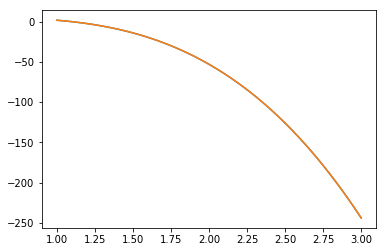

In [94]:
x = np.linspace(1,3)

plt.plot(x,deriv_ac(x))

plt.plot(x, deriv(x, h))
plt.show()


0.1 53.937869390630844
0.01 5.241607890999841
0.001 0.5226593663757246
0.0001 0.05225094433387696
1e-05 0.005224950988732984
1e-06 0.0005226345250156033
1.0000000000000001e-07 5.107987087210172e-05
1e-08 1.1163067502708458e-05
1e-09 0.00011904421027850139
1e-10 0.001016143665819855


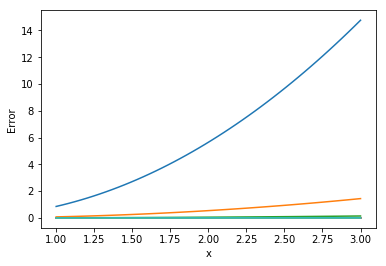

0.1 137.78447547977018
0.01 1.365025728241501
0.001 0.013637447417513974
0.0001 0.0001363619376985205
1e-05 1.3644402823511026e-06
1e-06 3.899695919621063e-08
1.0000000000000001e-07 3.5640506164530917e-07
1e-08 2.5798609849753788e-06
1e-09 2.024650878482055e-05
1e-10 0.00022035912949971807


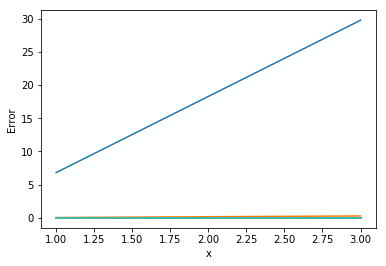

In [95]:
h0 = 0.1

for i in range(0,10):
    h = h0/10**i
    plt.plot(x, np.abs(deriv_ac(x) - der_right(x, h)), label = h)
    print(h, np.linalg.norm(deriv_ac(x) - der_right(x, h)))

plt.xlabel('x')

plt.ylabel('Error')

plt.show()

for i in range(0,10):
    h = h0/10**i
    plt.plot(x, np.abs(deriv_ac(x) - deriv(x, h)), label = h)
    print(h, np.linalg.norm(deriv_ac(x) - deriv(x, h)))


plt.xlabel('x')

plt.ylabel('Error')

plt.show()



Оптимальный шаг для формулы правой разностной производной h = 1e-08. Погрешность составляет 1.1163067502708458e-05.

Оптимальный шаг для найденной формулы производной h = 1e-06. Погрешность составляет 3.9017977578950376e-08